In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import pandas as pd

# coeffs_file = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig2-all-resid-ft.csv')
# resids_file = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/residuals/best_resids/fig2-all-resid-ft_61_63_64_44_51_best_resids_R2_0.2941_all.csv')

# coeffs_file = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_coeffs/fig2-all-resid-chk-ft_61_63_64_44_51_gACH_0_best_coeffs_R2_0.2009.csv')
# resids_file = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/residuals/best_resids/fig2-all-resid-chk-ft_61_63_64_44_51_best_resids_R2_0.2967_all.csv')

# coeffs_file = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_coeffs/fig2-all-resid-chk3-ft_61_63_64_44_51_gACH_0_best_coeffs_R2_0.2009.csv')
# resids_file = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/residuals/best_resids/fig2-all-resid-chk3-ft_61_63_64_44_51_best_resids_R2_0.2967_all.csv')


# coeffs_file = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_coeffs/fig2-all-resid-chk4-ft_61_63_64_44_51_gACH_0_best_coeffs_R2_0.2009.csv')
# resids_file = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/residuals/best_resids/fig2-all-resid-chk4-ft_61_63_64_44_51_best_resids_R2_0.2967_all.csv')

coeffs_file = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_coeffs/fig2-all-resid-chk5-ft_61_63_64_44_51_gACH_0_best_coeffs_R2_0.2083.csv')
resids_file = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/residuals/best_resids/fig2-all-resid-chk5-ft_61_63_64_44_51_best_resids_R2_0.1406_all.csv')


In [14]:
coeffs_file

,Unnamed: 0,mouse_id,channel_name,int,rDA_-20,rDA_-19,rDA_-18,rDA_-17,rDA_-16,rDA_-15,...,rDA_11,rDA_12,rDA_13,rDA_14,rDA_15,rDA_16,rDA_17,rDA_18,rDA_19,rDA_20
0,fig2-all-resid-chk5-ft_61_63_64_44_51_gACH_0,61_63_64_44_51,gACH_0,0.0,0.021182,0.010474,0.011834,0.010808,0.009133,0.005929,...,0.030646,0.026456,0.015777,0.008374,-0.003425,-0.002168,0.001382,0.005385,0.002388,-0.004673


In [15]:
from sglm.features import setup_model_fit as smf
resids_file, X_cols_sftd = smf.timeshift_vals_by_dict(resids_file, {'rDA': (-20, 20)})

In [16]:
# coeffs_file[[_ for _ in coeffs_file.columns if 'rDA_' in _]].iloc[0]

In [17]:
resids_file.columns

Index(['index', 'file_num', 'nTrial', 'wi_trial_keep', 'gDA', 'gACH', 'rDA',
       'photometryCenterInIndex', 'photometryCenterOutIndex',
       'photometrySideInIndexr', 'photometrySideInIndexnr',
       'photometrySideOutIndex', 'spnnrOff', 'sl', 'photometrySideInIndexAA',
       'photometrySideInIndexAa', 'photometrySideInIndexaA',
       'photometrySideInIndexaa', 'photometrySideInIndexAB',
       'photometrySideInIndexAb', 'photometrySideInIndexaB',
       'photometrySideInIndexab', 'pred_paramsNum=0_gACH',
       'pred_paramsNum=1_rDA', 'rDA_-20', 'rDA_-19', 'rDA_-18', 'rDA_-17',
       'rDA_-16', 'rDA_-15', 'rDA_-14', 'rDA_-13', 'rDA_-12', 'rDA_-11',
       'rDA_-10', 'rDA_-9', 'rDA_-8', 'rDA_-7', 'rDA_-6', 'rDA_-5', 'rDA_-4',
       'rDA_-3', 'rDA_-2', 'rDA_-1', 'rDA_0', 'rDA_1', 'rDA_2', 'rDA_3',
       'rDA_4', 'rDA_5', 'rDA_6', 'rDA_7', 'rDA_8', 'rDA_9', 'rDA_10',
       'rDA_11', 'rDA_12', 'rDA_13', 'rDA_14', 'rDA_15', 'rDA_16', 'rDA_17',
       'rDA_18', 'rDA_19', 'rDA_20

In [18]:
resids_file['pred'] = (resids_file[[_ for _ in coeffs_file.columns if 'rDA_' in _]]*coeffs_file[[_ for _ in coeffs_file.columns if 'rDA_' in _]].iloc[0]).sum(axis=1)

i 0 j 0 — photometrySideInIndexr — gACH — True
[[-2.00000000e+01 -1.36707136e-01]
 [-1.90000000e+01 -7.60298995e-02]
 [-1.80000000e+01 -1.08312011e-02]
 [-1.70000000e+01  4.00616411e-02]
 [-1.60000000e+01  5.81973185e-02]
 [-1.50000000e+01  9.49956239e-02]
 [-1.40000000e+01  1.25406252e-01]
 [-1.30000000e+01  9.79871847e-02]
 [-1.20000000e+01  1.54526333e-02]
 [-1.10000000e+01 -1.56048759e-01]
 [-1.00000000e+01 -3.21574287e-01]
 [-9.00000000e+00 -4.92278229e-01]
 [-8.00000000e+00 -6.17182421e-01]
 [-7.00000000e+00 -6.56091822e-01]
 [-6.00000000e+00 -6.40647114e-01]
 [-5.00000000e+00 -5.77105420e-01]
 [-4.00000000e+00 -4.69516769e-01]
 [-3.00000000e+00 -3.55989605e-01]
 [-2.00000000e+00 -1.73573169e-01]
 [-1.00000000e+00  2.61358303e-01]
 [ 0.00000000e+00  6.52816825e-01]
 [ 1.00000000e+00  8.08524400e-01]
 [ 2.00000000e+00  1.05441966e+00]
 [ 3.00000000e+00  6.06643154e-01]
 [ 4.00000000e+00  2.22999464e-01]
 [ 5.00000000e+00  4.64115732e-02]
 [ 6.00000000e+00 -7.54144580e-03]
 [ 7.000

/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/sglm/visualization/visualize.py:480: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


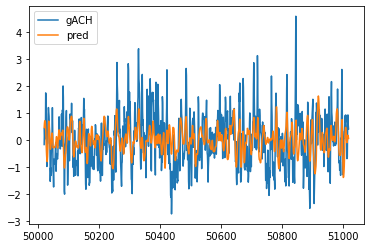

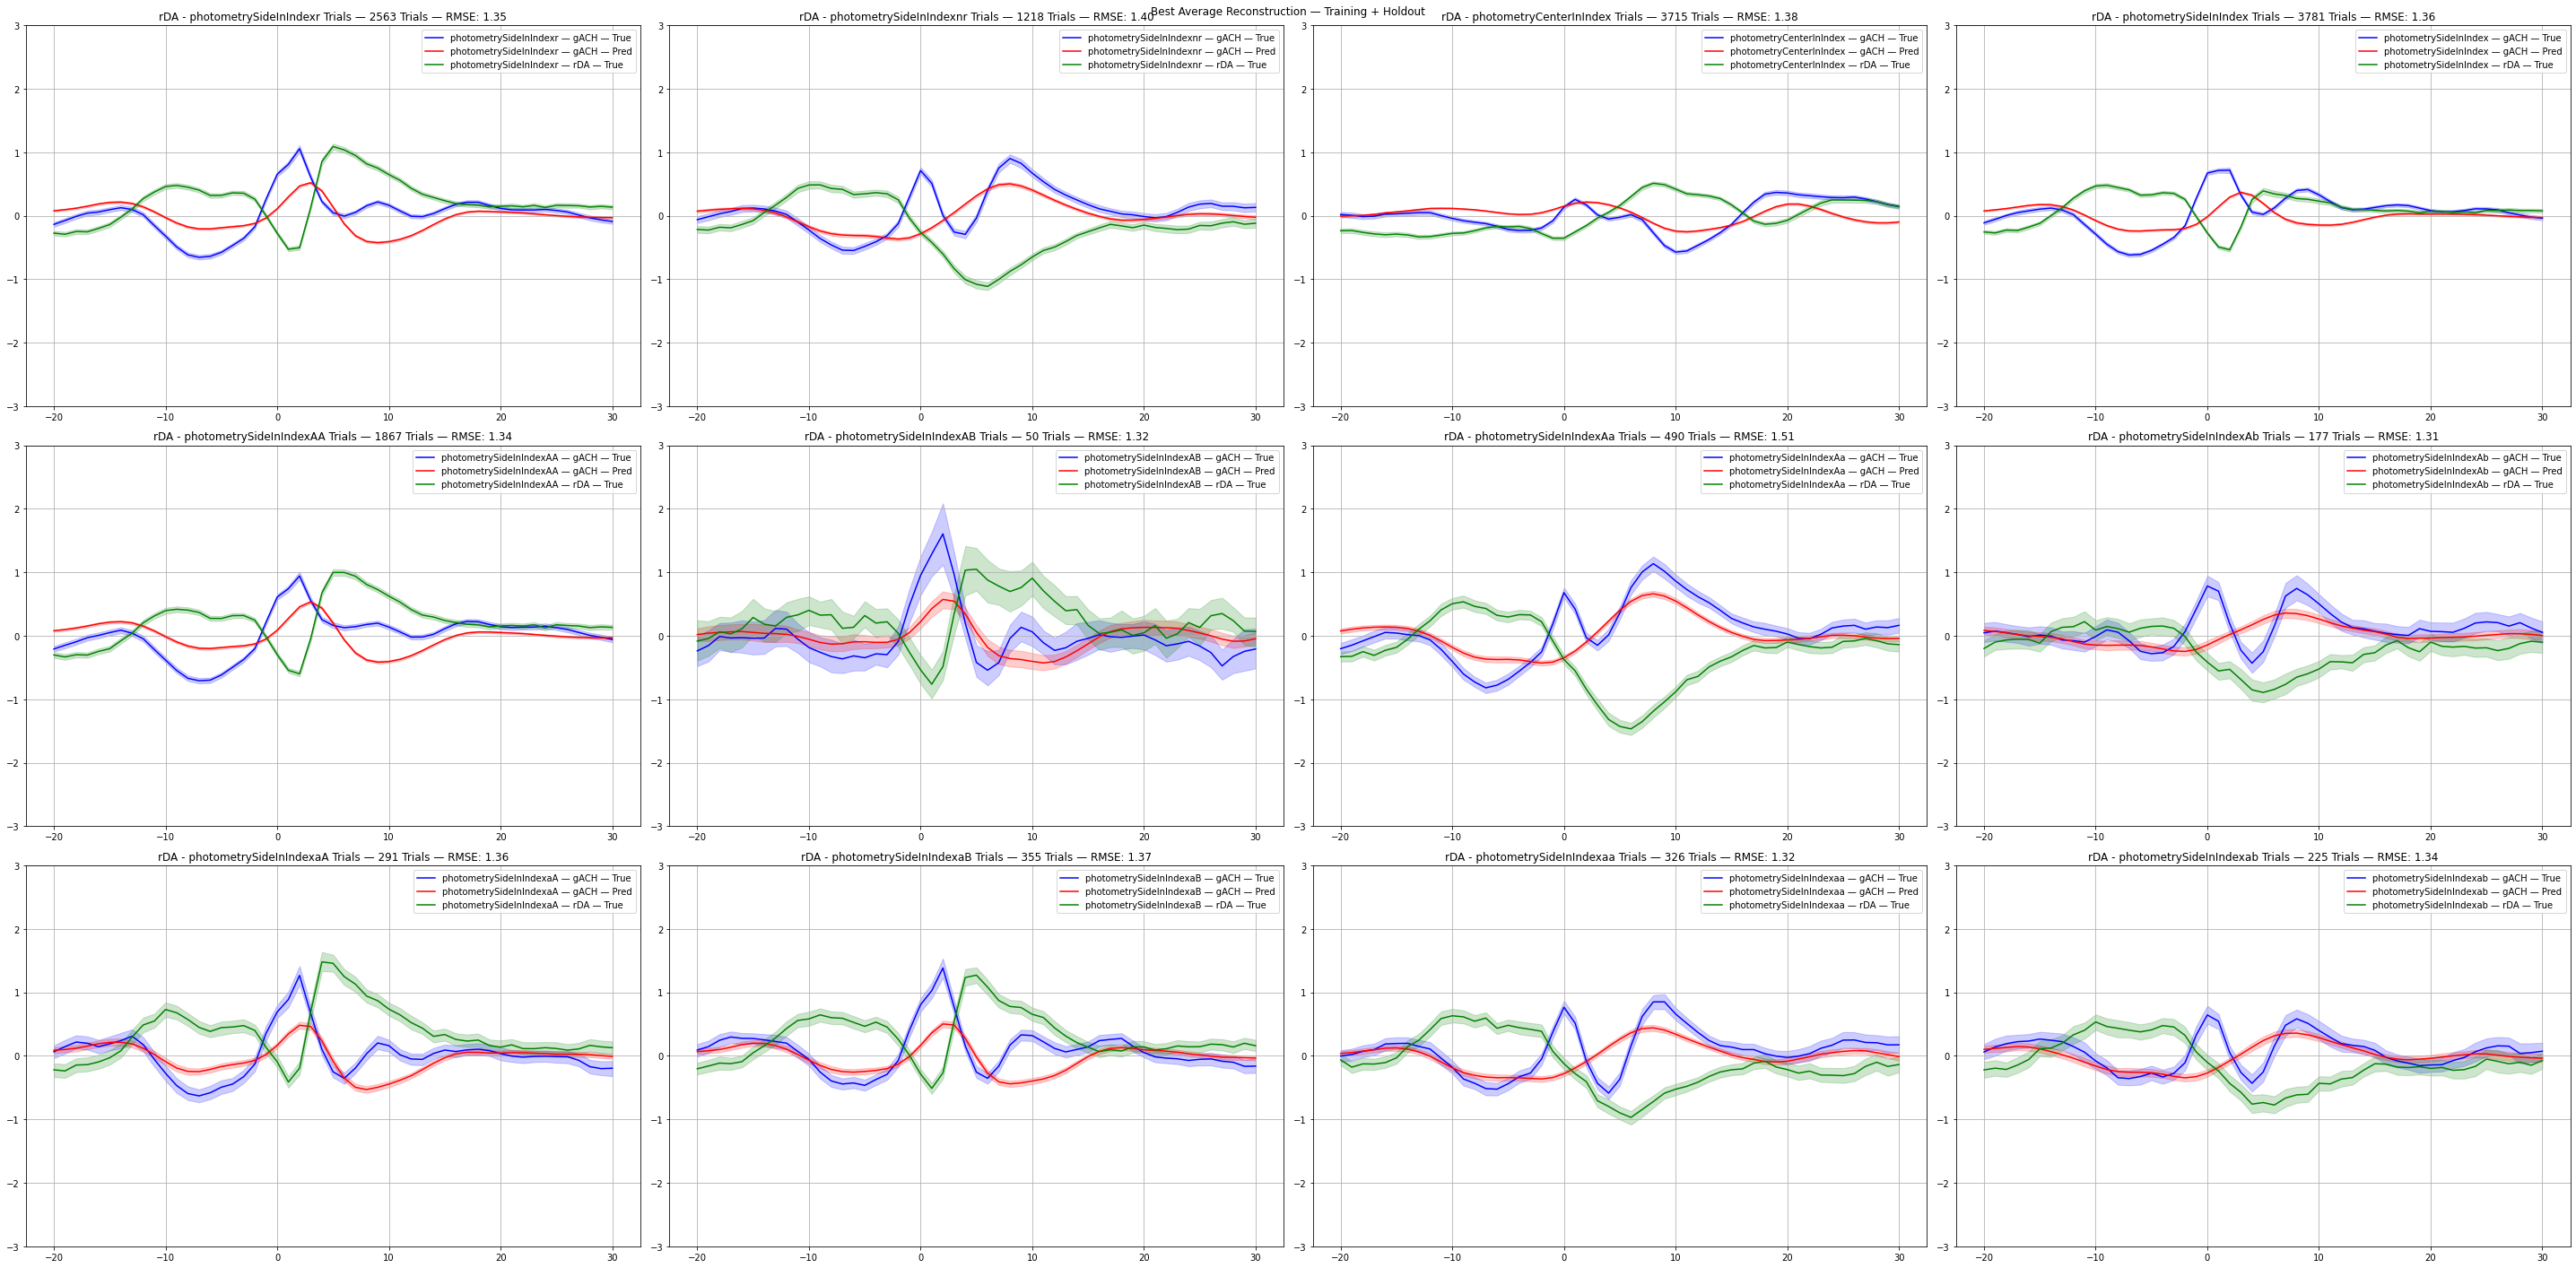

In [19]:
import numpy as np

# resids_file[['pred_paramsNum=0_gACH', 'new_pred']].plot()
resids_file[['gACH', 'pred']].iloc[50000:51000].plot()

resids_file['nEndTrial'] = np.nan
resids_file.loc[resids_file['wi_trial_keep'] == False, 'nEndTrial'] = resids_file.loc[resids_file['wi_trial_keep'] == False, 'nTrial']
resids_file.loc[resids_file['wi_trial_keep'] == True, 'nEndTrial'] = resids_file.loc[resids_file['wi_trial_keep'] == True, 'nTrial'] - 1
resids_file['photometrySideInIndex'] = resids_file['photometrySideInIndexr'] + resids_file['photometrySideInIndexnr']

from sglm.visualization import visualize

visualize.plot_avg_reconstructions_v2(resids_file,
                                        alignment_col_lst=[ #'cpn', 'spnr', 'spnnr',
                                                            # 'photometryCenterInIndex', #'photometryCenterOutIndex',
                                                            'photometrySideInIndexr', 'photometrySideInIndexnr',

                                                            'photometryCenterInIndex', #'photometryCenterOutIndex',
                                                            'photometrySideInIndex',

                                                            # 'photometrySideOutIndexr', 'photometrySideOutIndexnr',

                                                            'photometrySideInIndexAA',
                                                            'photometrySideInIndexAB',
                                                            'photometrySideInIndexAa',
                                                            'photometrySideInIndexAb',
                                                            'photometrySideInIndexaA',
                                                            'photometrySideInIndexaB',
                                                            'photometrySideInIndexaa',
                                                            'photometrySideInIndexab',


                                                            # 'photometrySideOutIndexAA', 'photometrySideOutIndexAa',
                                                            # 'photometrySideOutIndexaA', 'photometrySideOutIndexaa',
                                                            # 'photometrySideOutIndexAB', 'photometrySideOutIndexAb',
                                                            # 'photometrySideOutIndexaB', 'photometrySideOutIndexab',
                                                    ],
                                    
                                        # channel='gACH',
                                        channels={'gACH':True, 'rDA':False},
                                        binsize = 54,
                                        plot_width=4,
                                        # plot_width=2,
                                        min_time = -20,
                                        max_time = 30,
                                        min_signal = -3.0,
                                        max_signal = 3.0,
                                        title=f'Best Average Reconstruction — Training + Holdout',
                                        save_data='/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/avg_recons'
                                        )

In [20]:
with pd.option_context('display.max_columns',1000):
    display(resids_file)
    

,index,file_num,nTrial,wi_trial_keep,gDA,gACH,rDA,photometryCenterInIndex,photometryCenterOutIndex,photometrySideInIndexr,photometrySideInIndexnr,photometrySideOutIndex,spnnrOff,sl,photometrySideInIndexAA,photometrySideInIndexAa,photometrySideInIndexaA,photometrySideInIndexaa,photometrySideInIndexAB,photometrySideInIndexAb,photometrySideInIndexaB,photometrySideInIndexab,pred_paramsNum=0_gACH,pred_paramsNum=1_rDA,rDA_-20,rDA_-19,rDA_-18,rDA_-17,rDA_-16,rDA_-15,rDA_-14,rDA_-13,rDA_-12,rDA_-11,rDA_-10,rDA_-9,rDA_-8,rDA_-7,rDA_-6,rDA_-5,rDA_-4,rDA_-3,rDA_-2,rDA_-1,rDA_0,rDA_1,rDA_2,rDA_3,rDA_4,rDA_5,rDA_6,rDA_7,rDA_8,rDA_9,rDA_10,rDA_11,rDA_12,rDA_13,rDA_14,rDA_15,rDA_16,rDA_17,rDA_18,rDA_19,rDA_20,pred,nEndTrial,photometrySideInIndex
20,1238,4,1,True,1.470717,2.190028,1.296316,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.801169,0.061185,-0.007415,0.079463,0.294209,0.449287,0.543021,0.585670,0.183165,-0.111161,0.201948,0.484660,0.764081,0.845768,0.333436,0.593396,1.112151,1.065251,1.314665,1.371776,1.298291,1.380210,1.296316,-0.281804,-1.384964,-1.239470,-0.884459,-0.879630,-0.595071,-1.007983,-0.790538,-0.947699,0.183855,1.383490,1.471137,1.129381,1.104801,1.511917,0.084224,-1.437174,-0.970600,-1.002815,-0.709284,0.801169,0.0,0.0
21,1239,4,1,True,1.988648,1.259181,1.380210,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306083,0.397592,0.269737,-0.007415,0.079463,0.294209,0.449287,0.543021,0.585670,0.183165,-0.111161,0.201948,0.484660,0.764081,0.845768,0.333436,0.593396,1.112151,1.065251,1.314665,1.371776,1.298291,1.380210,1.296316,-0.281804,-1.384964,-1.239470,-0.884459,-0.879630,-0.595071,-1.007983,-0.790538,-0.947699,0.183855,1.383490,1.471137,1.129381,1.104801,1.511917,0.084224,-1.437174,-0.970600,-1.002815,0.306083,0.0,0.0
22,1240,4,1,True,2.307198,0.024223,1.298291,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.185508,0.637816,-0.095857,0.269737,-0.007415,0.079463,0.294209,0.449287,0.543021,0.585670,0.183165,-0.111161,0.201948,0.484660,0.764081,0.845768,0.333436,0.593396,1.112151,1.065251,1.314665,1.371776,1.298291,1.380210,1.296316,-0.281804,-1.384964,-1.239470,-0.884459,-0.879630,-0.595071,-1.007983,-0.790538,-0.947699,0.183855,1.383490,1.471137,1.129381,1.104801,1.511917,0.084224,-1.437174,-0.970600,-0.185508,0.0,0.0
23,1241,4,1,True,1.844888,-0.178360,1.371776,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.522343,0.714577,0.198202,-0.095857,0.269737,-0.007415,0.079463,0.294209,0.449287,0.543021,0.585670,0.183165,-0.111161,0.201948,0.484660,0.764081,0.845768,0.333436,0.593396,1.112151,1.065251,1.314665,1.371776,1.298291,1.380210,1.296316,-0.281804,-1.384964,-1.239470,-0.884459,-0.879630,-0.595071,-1.007983,-0.790538,-0.947699,0.183855,1.383490,1.471137,1.129381,1.104801,1.511917,0.084224,-1.437174,-0.522343,0.0,0.0
24,1242,4,1,True,1.427467,-0.502830,1.314665,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.709839,0.788512,0.083584,0.198202,-0.095857,0.269737,-0.007415,0.079463,0.294209,0.449287,0.543021,0.585670,0.183165,-0.111161,0.201948,0.484660,0.764081,0.845768,0.333436,0.593396,1.112151,1.065251,1.314665,1.371776,1.298291,1.380210,1.296316,-0.281804,-1.384964,-1.239470,-0.884459,-0.879630,-0.595071,-1.007983,-0.790538,-0.947699,0.183855,1.383490,1.471137,1.129381,1.104801,1.511917,0.084224,-0.709839,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280296,25467,13,242,False,-0.763441,-0.131115,-0.484565,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.336947,-1.742292,-0.905004,0.095561,0.273174,-0.489768,0.845132,0.108560,1.599599,0.714831,-0.195888,-0.587386,-0.861897,-0.837036,-0.399343,-0.998878,-0.970977,-0.724066,-0.625869,-0.864737,-0.399314,-1.295973,-0.484565,-0.539404,-0.307169,-1.347298,0.271822,-0.071577,-0.

['/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/avg_recons/XY--1_2--photometrySideInIndexAa — gACH — True.npy', '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/avg_recons/XY--2_0--photometrySideInIndexaA — rDA — True.npy', '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/avg_recons/XY--1_1--photometrySideInIndexAB — gACH — True.npy', '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/avg_recons/XY--1_3--photometrySideInIndexAb — rDA — True.npy', '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/avg_recons/XY--0_2--photometryCenterInIndex — gACH — True.npy', '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/avg_recons/XY--1_3--photometrySideInIndexAb — gACH — True.npy', '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/avg_recons/XY--1_0--photometrySideInIndexAA — gACH — True.npy', '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/avg_recons/XY--0_0--photometrySideInIndex

(-1.5, 1.5)

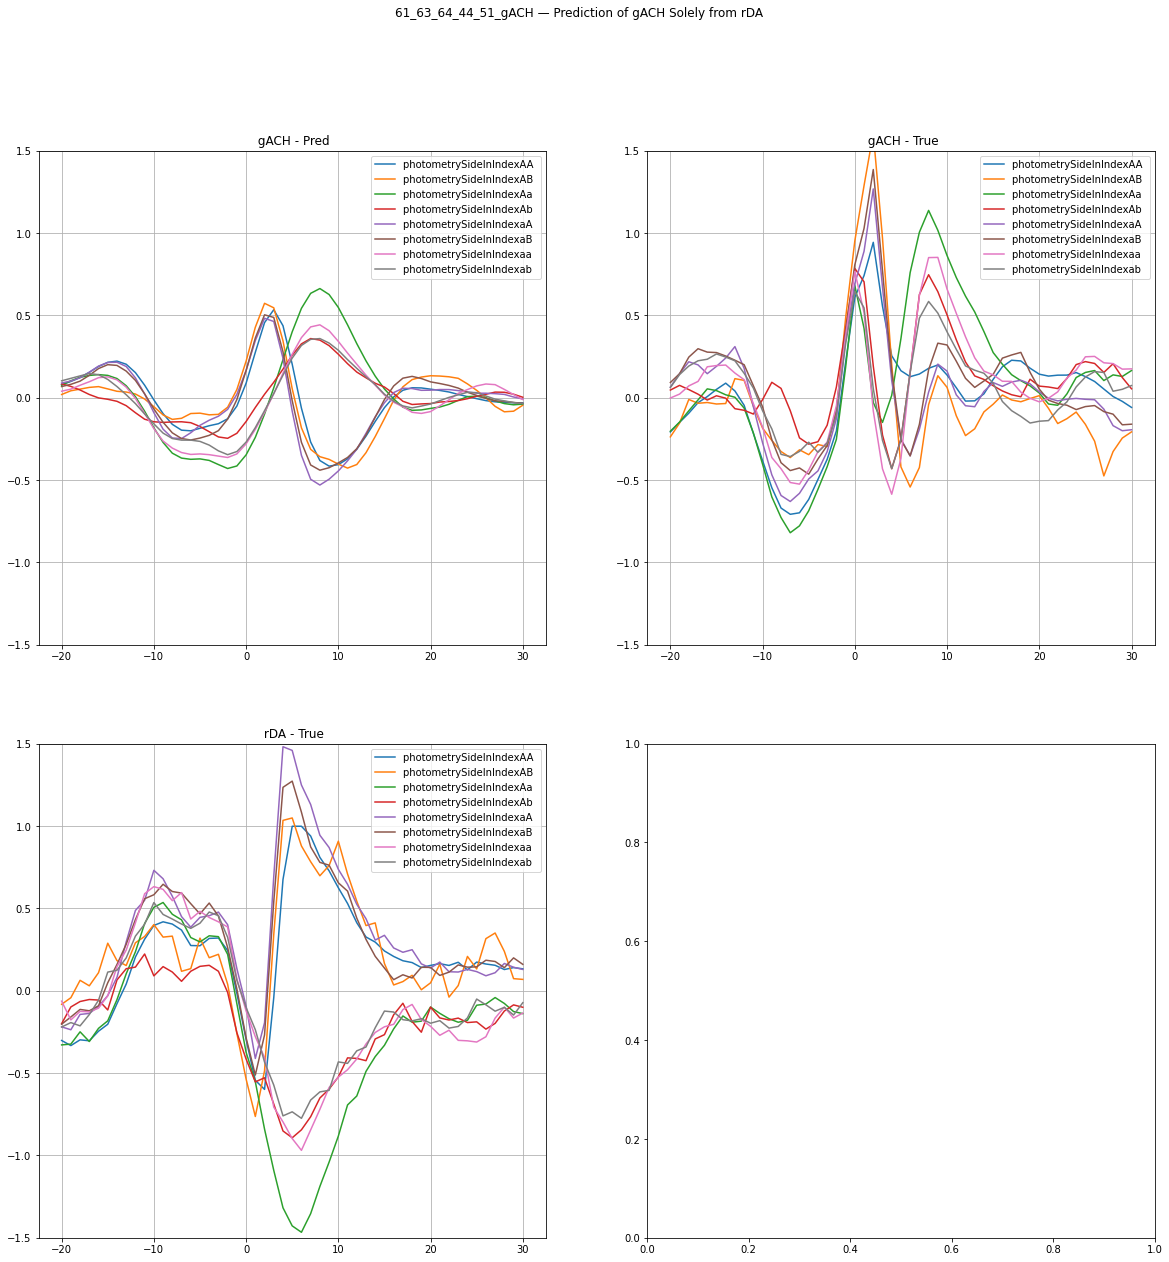

In [21]:
import glob
import matplotlib.pyplot as plt


ars = glob.glob('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/avg_recons/*')
print(ars)

fig,ax = plt.subplots(2,2,figsize=(20,20))
fig.suptitle('61_63_64_44_51_gACH — Prediction of gACH Solely from rDA')
fig.set_facecolor('w')

for ar in sorted(ars):
    shrt_ar = ar.split('/')[-1].split('--')[-1].split('.')[0]
    label_title = shrt_ar.split('—')
    if 'photometrySideIn' in shrt_ar and 'Pred' in shrt_ar and shrt_ar and 'gACH' in shrt_ar and ('aa' in shrt_ar.lower() or 'ab' in shrt_ar.lower()):
        npar = np.load(ar)
        ax[0,0].plot(npar[:,0], npar[:,1], label=label_title[0])#, alpha=0.8)
        print(shrt_ar)
        # print(npar[:,0], npar[:,1])
        ax[0,0].set_title('-'.join(label_title[1:]))
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_ylim(-1.5,1.5)

for ar in sorted(ars):
    shrt_ar = ar.split('/')[-1].split('--')[-1].split('.')[0]
    label_title = shrt_ar.split('—')
    if 'photometrySideIn' in shrt_ar and 'True' in shrt_ar and 'gACH' in shrt_ar and ('aa' in shrt_ar.lower() or 'ab' in shrt_ar.lower()):
        npar = np.load(ar)
        ax[0,1].plot(npar[:,0], npar[:,1], label=label_title[0])#, alpha=0.8)
        print(shrt_ar)
        # print(npar[:,0], npar[:,1])
        ax[0,1].set_title('-'.join(label_title[1:]))
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_ylim(-1.5,1.5)

for ar in sorted(ars):
    shrt_ar = ar.split('/')[-1].split('--')[-1].split('.')[0]
    label_title = shrt_ar.split('—')
    if 'photometrySideIn' in shrt_ar and 'True' in shrt_ar and 'rDA' in shrt_ar and ('aa' in shrt_ar.lower() or 'ab' in shrt_ar.lower()):
        npar = np.load(ar)
        ax[1,0].plot(npar[:,0], npar[:,1], label=label_title[0])#, alpha=0.8)
        print(shrt_ar)
        # print(npar[:,0], npar[:,1])
        ax[1,0].set_title('-'.join(label_title[1:]))
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_ylim(-1.5,1.5)
